1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3708 - loss: 1.7070 - val_accuracy: 0.5909 - val_loss: 1.1709


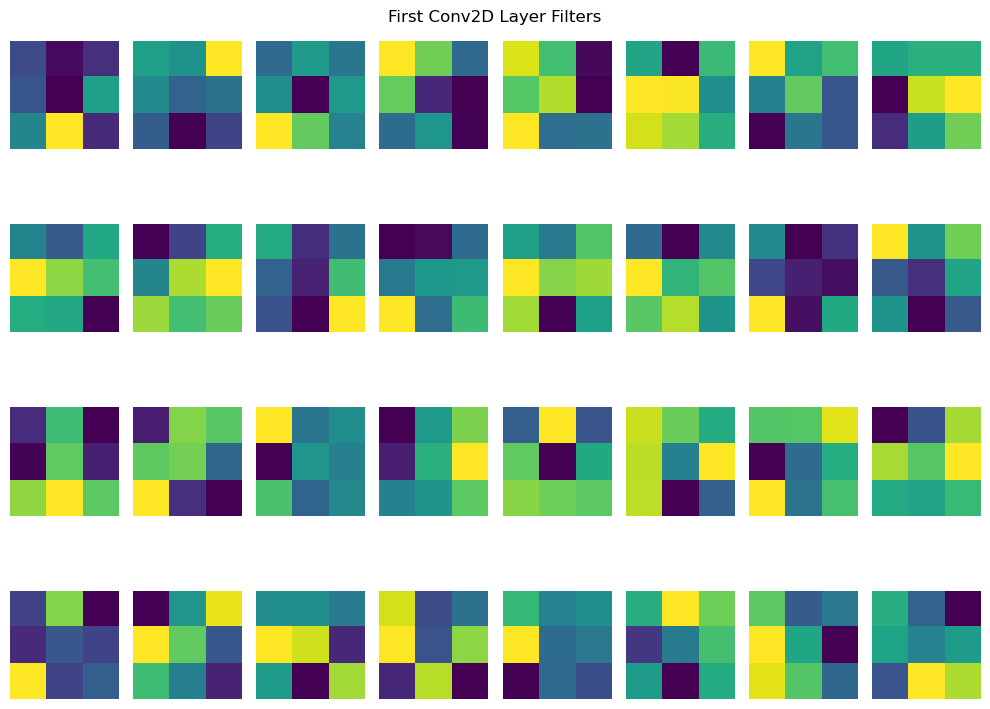

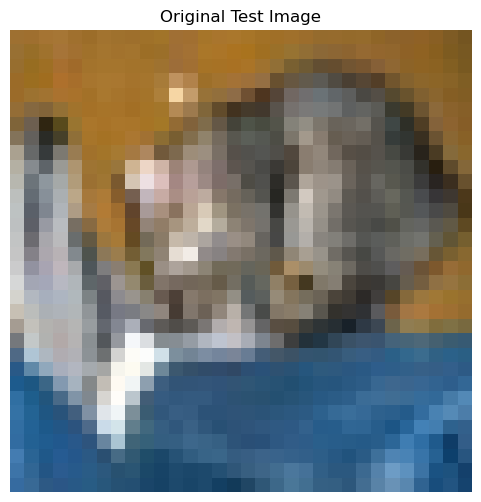

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


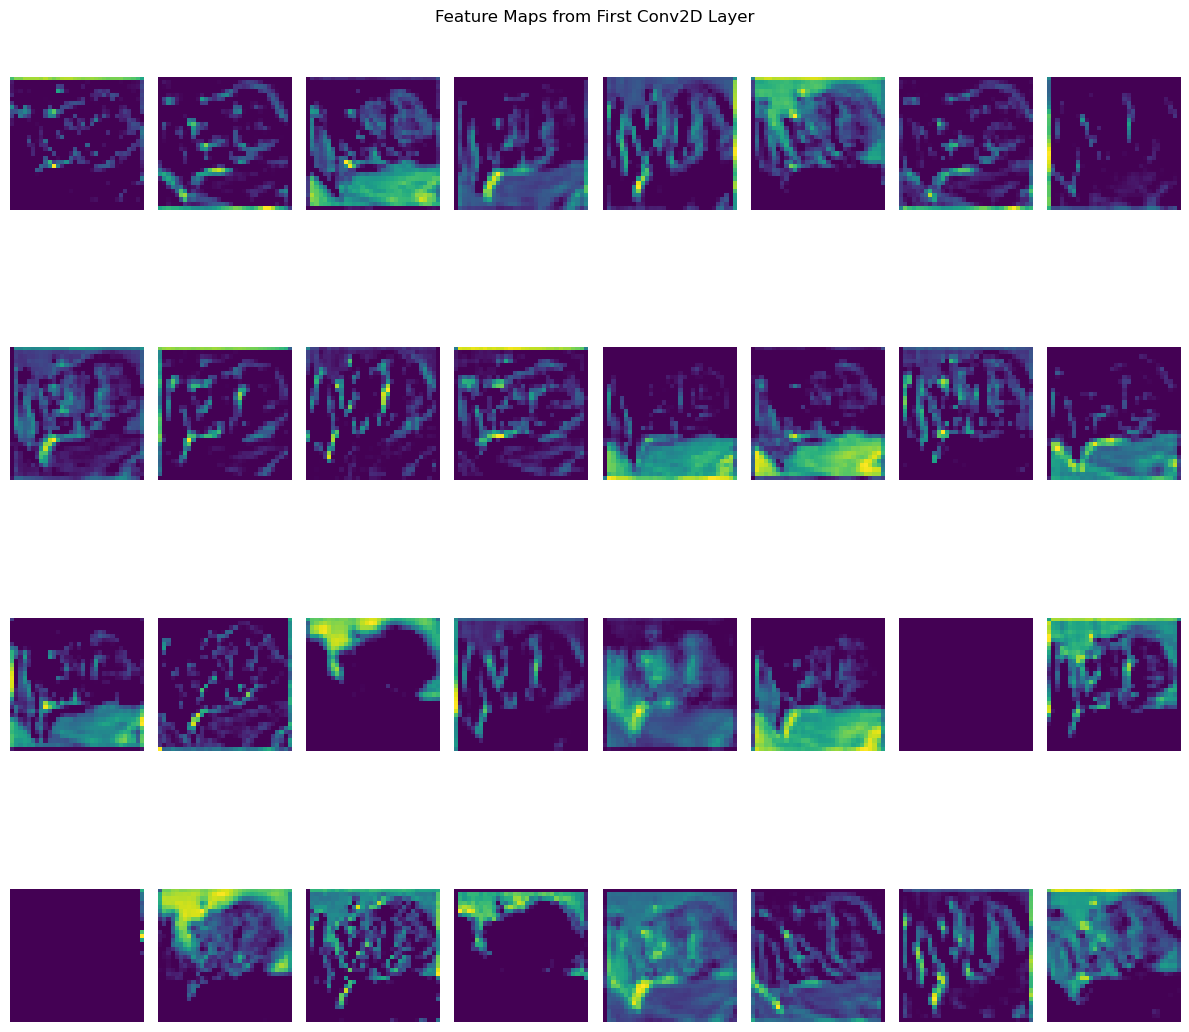


### Interpretation ###
The filters in the first Conv2D layer detect low-level features such as edges, textures, and simple patterns.
The feature maps show how these filters respond to specific regions of the input image.
By visualizing the feature maps, we can observe which parts of the image activate each filter,
providing insights into what the network learns at an early stage.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
z
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

inputs = tf.keras.Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
first_conv_output = x 
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

feature_extractor = tf.keras.Model(inputs=inputs, outputs=first_conv_output)

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=1, 
    batch_size=32,
    verbose=1
)

filters = model.layers[1].get_weights()[0]  

plt.figure(figsize=(10, 8))
for i in range(32): 
    plt.subplot(4, 8, i + 1)
    
    filter_img = filters[:, :, :, i]
    
    filter_img = np.mean(filter_img, axis=2)
    
    filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min() + 1e-7)
    
    plt.imshow(filter_img, cmap="viridis")
    plt.axis("off")
plt.tight_layout()
plt.suptitle("First Conv2D Layer Filters", y=0.95)
plt.savefig('conv_filters.png')
plt.show()

test_image = x_test[0] 
test_image_display = np.copy(test_image)  

plt.figure(figsize=(6, 6))
plt.imshow(test_image_display)
plt.title("Original Test Image")
plt.axis("off")
plt.savefig('original_image.png')
plt.show()

test_image_batch = np.expand_dims(test_image, axis=0)
feature_maps = feature_extractor.predict(test_image_batch)
feature_maps = feature_maps[0]  

plt.figure(figsize=(12, 12))
for i in range(32): 
    plt.subplot(4, 8, i + 1)
    
    feature_map = feature_maps[:, :, i]
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min() + 1e-7)
    
    plt.imshow(feature_map, cmap="viridis")
    plt.axis("off")
plt.tight_layout()
plt.suptitle("Feature Maps from First Conv2D Layer", y=0.95)
plt.savefig('feature_maps.png')
plt.show()

print("\n### Interpretation ###")
print("The filters in the first Conv2D layer detect low-level features such as edges, textures, and simple patterns.")
print("The feature maps show how these filters respond to specific regions of the input image.")
print("By visualizing the feature maps, we can observe which parts of the image activate each filter,")
print("providing insights into what the network learns at an early stage.")